In [1]:
COLOR_PALETTE = [    
               "#348ABD",
               "#A60628",
               "#7A68A6",
               "#467821",
               "#CF4457",
               "#188487",
               "#E24A33"
              ]

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import random

In [3]:
# Signal Parameters
number_of_samples  = 1000
frequency_of_signal  = 5  
sample_time = 0.001
amplitude = 1 

# Noise Parameters
mu = 0
sigma = 1

signal = [amplitude * np.sin((2 * np.pi) * frequency_of_signal * ii * sample_time) for ii in range(number_of_samples)]
s_time = [ii * sample_time for ii in range(number_of_samples)]
noise = [random.gauss(mu, sigma) for _ in range(number_of_samples)]
signal_with_noise = [ii + jj for ii, jj in zip(signal, noise)]

In [10]:
plt.figure(figsize=(12, 6));
plt.plot(signal);
plt.title('Original Signal');


In [5]:
plt.figure(figsize=(12, 6));
plt.plot(signal_with_noise);
plt.title('Signal with Noise');

In [17]:
fft_of_signal_with_noise = np.fft.fft(signal_with_noise)
f = np.fft.fftfreq(len(fft_of_signal_with_noise),sample_time)

def bandpass_filter(x, freq, frequency_of_signal=frequency_of_signal, band = 0.05):
    if (frequency_of_signal - band) < abs(freq) < (frequency_of_signal + band):
        return x
    else:
        return 0
    
F_filtered = np.asanyarray([bandpass_filter(x,freq) for x,freq in zip(fft_of_signal_with_noise, f)]);
filtered_signal = np.fft.ifft(F_filtered);


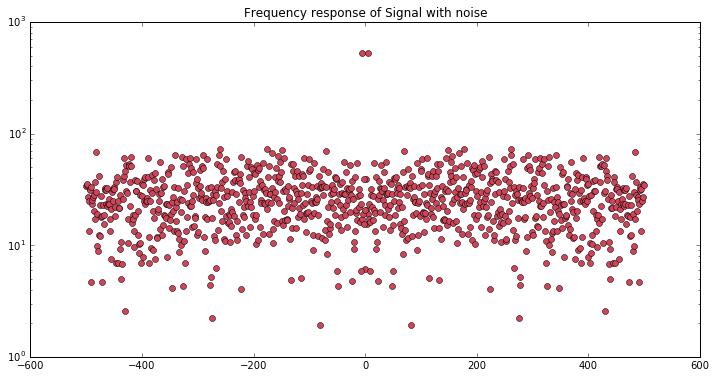

In [20]:
plt.figure(figsize=(12, 6));
plt.semilogy(f, abs(fft_of_signal_with_noise), 'o', c=COLOR_PALETTE[4]);
plt.title('Frequency response of Signal with noise');
plt.show()

In [8]:
figure = plt.figure(figsize=(16, 16));
plt.subplot(4,1,1);
plt.plot(s_time, signal, COLOR_PALETTE[0]);
plt.ylabel('Original Signal');
 
plt.subplot(4,1,2);
plt.plot(s_time, signal_with_noise, COLOR_PALETTE[1]);
plt.ylabel('Signal with Noise');

plt.subplot(4,1,3);
plt.plot(s_time, filtered_signal, COLOR_PALETTE[2]);
plt.ylabel('Filtered Signal');
plt.ylim([-amplitude, amplitude]);

plt.subplot(4,1,4);
plt.semilogy(f, abs(F_filtered), 'o');
# Frequency response will be symmetric, no need to get the negative component
plt.title('Frequency Spectrum of Filtered Signal')
plt.xlim([0, 50]); 
plt.xlabel('frequency(Hz)');

/Users/JRod/Library/Python/3.5/lib/python/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
